<a href="https://colab.research.google.com/github/Monica-aids/codsoft_02/blob/main/MOVIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
print("Data:")
print(df.head())

Data:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  

Model: RandomForest
Mean Squared Error: 8.08
R-squared: -0.26



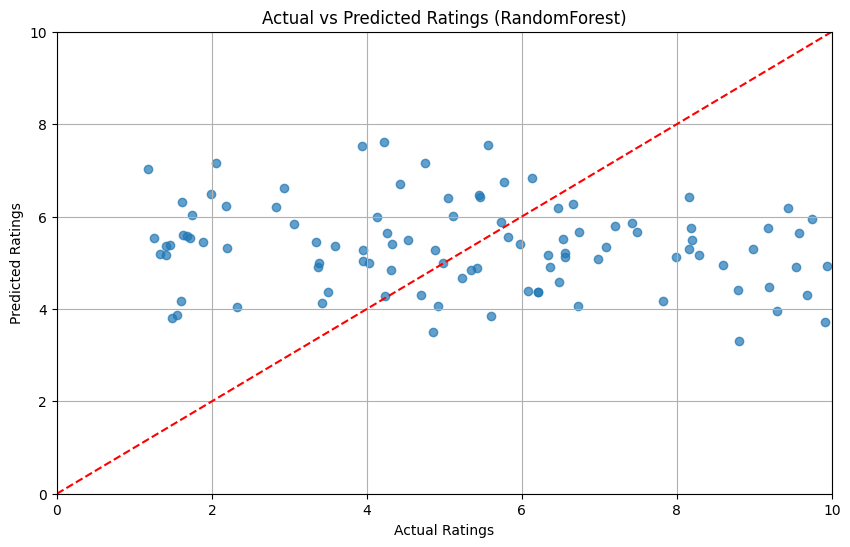

Model: LinearRegression
Mean Squared Error: 158.83
R-squared: -23.74



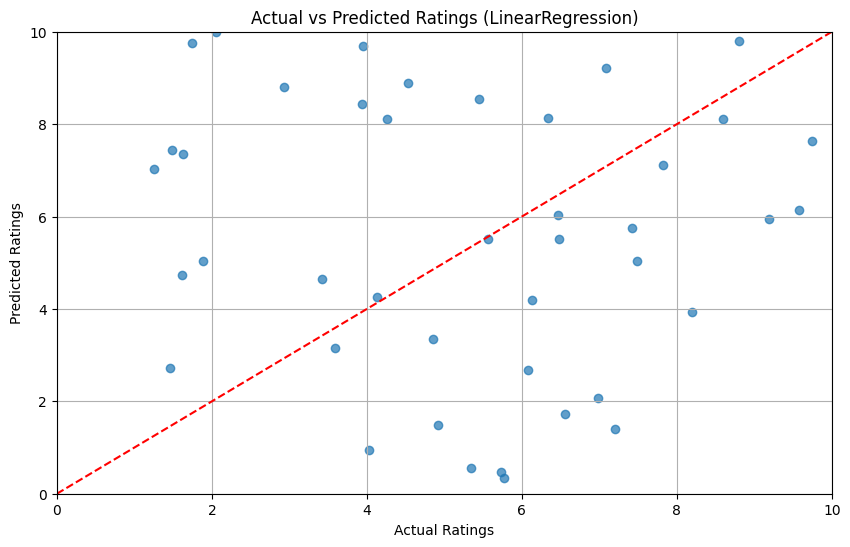

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
data = {
    'Name': ['Movie {}'.format(i) for i in range(1, 101)],
    'Year': np.random.choice(range(2000, 2022), size=100),
    'Duration': np.random.choice(range(80, 181), size=100),
    'Genre': np.random.choice(['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Sci-Fi'], size=100),
    'Rating': np.random.uniform(1, 10, size=100),
    'Votes': np.random.choice(range(50, 5000), size=100),
    'Director': np.random.choice(['Director {}'.format(i) for i in range(1, 21)], size=100),
    'Actor 1': np.random.choice(['Actor {}'.format(i) for i in range(1, 21)], size=100),
    'Actor 2': np.random.choice(['Actor {}'.format(i) for i in range(1, 21)], size=100),
    'Actor 3': np.random.choice(['Actor {}'.format(i) for i in range(1, 21)], size=100)
}
df = pd.DataFrame(data)
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['Year', 'Duration', 'Votes']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression()
}
X = df.drop('Rating', axis=1)
y = df['Rating']
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    y_pred = cross_val_predict(pipeline, X, y, cv=5)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}\n')
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.7)
    plt.plot([0, 10], [0, 10], 'r--')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title(f'Actual vs Predicted Ratings ({model_name})')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.show()